In [14]:
from sklearn.metrics import precision_recall_curve, average_precision_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.datasets import load_wine, make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# For binary classification
X_binary, y_binary = make_classification(n_samples=1000, n_classes=2, random_state=42)

x_train, x_test, y_train, y_test = train_test_split(
    X_binary, y_binary, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(x_train)
X_test_scaled = scaler.transform(x_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]
y_pred = model.predict(x_test)

**Precision-Recall Curve**
- Better than ROC for imbalanced datasets.

In [16]:
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

print(avg_precision)

0.9393898419680775


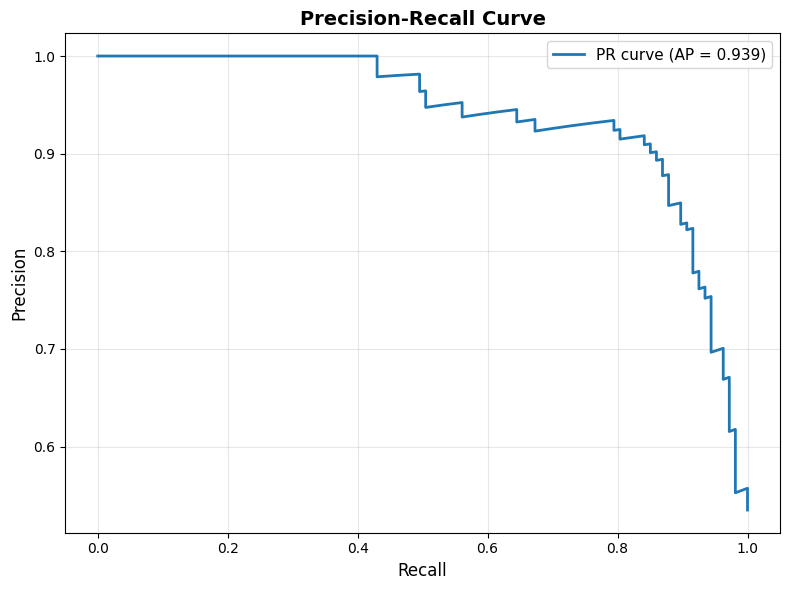

In [17]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR curve (AP = {avg_precision:.3f})', linewidth=2)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=14, fontweight='bold')
plt.legend(fontsize=11)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

**Complete Evaluation Function**

In [9]:
def evaluate_classification(y_true, y_pred, y_pred_proba=None, target_names=None):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    
    print("Classification Metrics:")
    print(f"  Accuracy:  {accuracy:.3f}")
    print(f"  Precision: {precision:.3f}")
    print(f"  Recall:    {recall:.3f}")
    print(f"  F1-Score:  {f1:.3f}")
    
    if y_pred_proba is not None and len(np.unique(y_true)) == 2:
        roc_auc = roc_auc_score(y_true, y_pred_proba)
        print(f"  ROC-AUC:   {roc_auc:.3f}")
        
    print("\nConfusion Matrix:")
    cm = confusion_matrix(y_true, y_pred)
    print(cm)
    
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred, target_names=target_names))

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

In [19]:
if len(np.unique(y_test)) == 2:
    metrics = evaluate_classification(y_test, y_pred, y_pred_proba)
    
else:
    metrics = evaluate_classification(y_test, y_pred)

Classification Metrics:
  Accuracy:  0.860
  Precision: 0.865
  Recall:    0.860
  F1-Score:  0.860
  ROC-AUC:   0.922

Confusion Matrix:
[[84  9]
 [19 88]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.90      0.86        93
           1       0.91      0.82      0.86       107

    accuracy                           0.86       200
   macro avg       0.86      0.86      0.86       200
weighted avg       0.86      0.86      0.86       200

